In [88]:
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
from numpy import exp
%matplotlib inline
from sklearn.datasets import make_spd_matrix
from scipy.special import factorial
import pandas as pd
import statsmodels.api as sm
from statsmodels.api import Poisson
from scipy import stats
from scipy.stats import norm

from sklearn.datasets import make_sparse_spd_matrix
from statsmodels.iolib.summary2 import summary_col

# 2 Dim Gaussians Data 

In [89]:
c_2D = 5
dots_2D = 1000
sprad_2D = 25
eps = 1e-8

In [90]:
labels_2D = np.array(range(0,c_2D))
labels_2D = np.repeat(labels_2D, dots_2D)
mu_x_2D = np.random.random_integers(0,sprad_2D+1,c_2D)
mu_y_2D = np.random.random_integers(0,sprad_2D+1,c_2D)

C:\Users\dorli\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 26 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dorli\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 26 + 1) instead
  after removing the cwd from sys.path.


In [91]:
mean_2D = np.zeros((c_2D,2))
cov_2D = np.zeros((c_2D,2,2))
for i in range(0,c_2D):
    mean_2D[i,0] = mu_x_2D[i]
    mean_2D[i,1] = mu_y_2D[i]
    cov_2D[i,:,:] = make_sparse_spd_matrix(2)

In [92]:
X_data_2D = np.zeros((c_2D*dots_2D,2))
for i in range(0,c_2D):
    X_data_2D[i*dots_2D:(i+1)*dots_2D,:] = np.random.multivariate_normal(mean_2D[i], cov_2D[i], dots_2D)

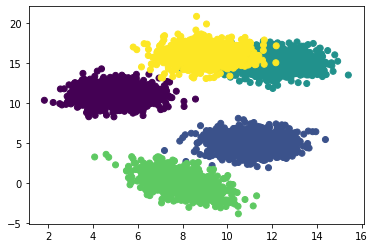

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(X_data_2D[:,0], X_data_2D[:,1], c = labels_2D)

# 3 Dim Gaussians Data 

In [114]:
c_3D = 7
dots_3D = 1000
sprad_3D = 15

In [115]:
labels_3D = np.array(range(0,c_3D))
labels_3D = np.repeat(labels_3D, dots_3D)
mu_x_3D = np.random.random_integers(-sprad_3D,sprad_3D+1,c_3D)
mu_y_3D = np.random.random_integers(-sprad_3D,sprad_3D+1,c_3D)
mu_z_3D = np.random.random_integers(-sprad_3D,sprad_3D+1,c_3D)

C:\Users\dorli\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(-15, 16 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dorli\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(-15, 16 + 1) instead
  after removing the cwd from sys.path.
C:\Users\dorli\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(-15, 16 + 1) instead
  """


In [116]:
mean_3D = np.zeros((c_3D,3))
cov_3D = np.zeros((c_3D,3,3))
for i in range(0,c_3D):
    mean_3D[i,0] = mu_x_3D[i]
    mean_3D[i,1] = mu_y_3D[i]
    mean_3D[i,2] = mu_z_3D[i]
    cov_3D[i,:,:] = make_sparse_spd_matrix(3)

In [117]:
X_data_3D = np.zeros((c_3D*dots_3D,3))
for i in range(0,c_3D):
    X_data_3D[i*dots_3D:(i+1)*dots_3D,:] = np.random.multivariate_normal(mean_3D[i], cov_3D[i], dots_3D)
    
print(X_data_3D.shape)

(7000, 3)


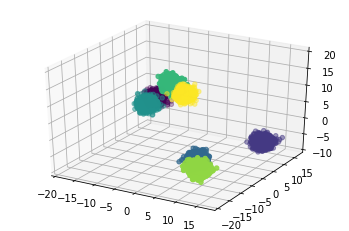

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111, projection= '3d')
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(X_data_3D[:,0], X_data_3D[:,1], X_data_3D[:,2], c = labels_3D)
plt.show()

# iris dataset

In [122]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

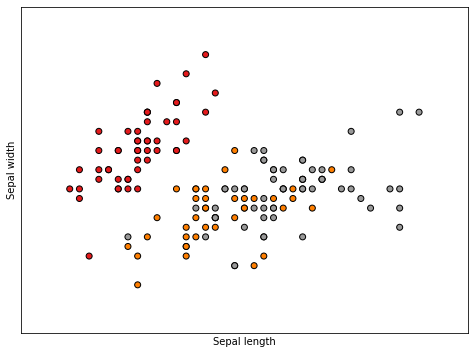

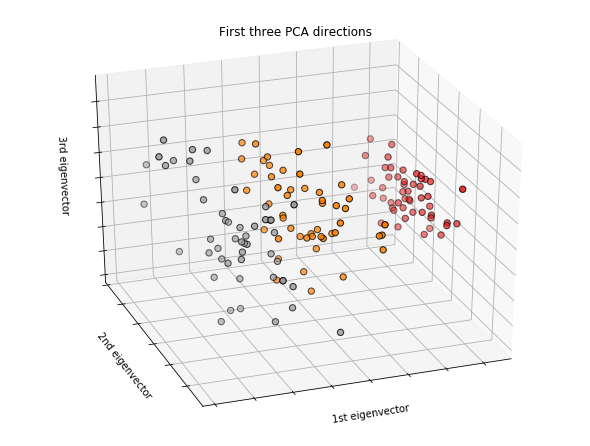

In [123]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

iris last 0,1,2 features


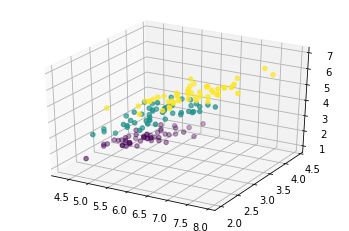

In [138]:
print("iris last 0,1,2 features")
fig = plt.figure()
ax = fig.add_subplot(111, projection= '3d')
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(iris['data'][:,0], iris['data'][:,1], iris['data'][:,2], c = iris.target)
plt.show()

iris last 0,1,3 features


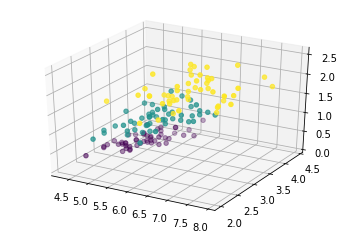

In [139]:
print("iris last 0,1,3 features")
fig = plt.figure()
ax = fig.add_subplot(111, projection= '3d')
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(iris['data'][:,0], iris['data'][:,1], iris['data'][:,3], c = iris.target)
plt.show()

iris last 1,2,3 features


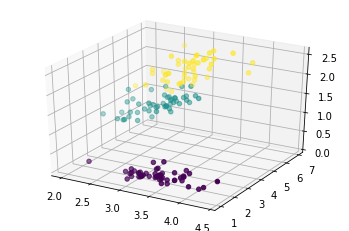

In [140]:
print("iris last 1,2,3 features")
fig = plt.figure()
ax = fig.add_subplot(111, projection= '3d')
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(iris['data'][:,1], iris['data'][:,2], iris['data'][:,3], c = iris.target)
plt.show()

iris last 0,2,3 features


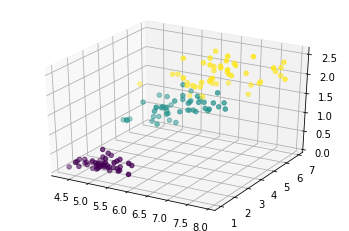

In [141]:
print("iris last 0,2,3 features")
fig = plt.figure()
ax = fig.add_subplot(111, projection= '3d')
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(iris['data'][:,0], iris['data'][:,2], iris['data'][:,3], c = iris.target)
plt.show()

In [142]:
print("two features")

two features


iris last 0,1 features


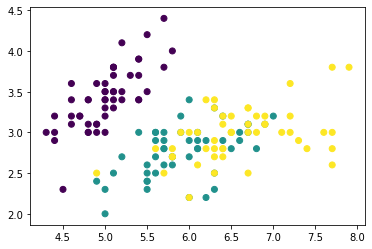

In [136]:
print("iris last 0,1 features")
fig = plt.figure()
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(iris['data'][:,0], iris['data'][:,1], c = iris.target)

iris last 0,2 features


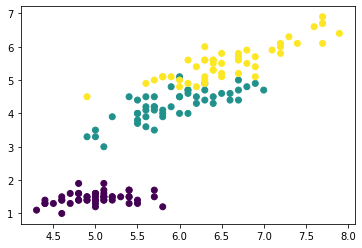

In [143]:
print("iris last 0,2 features")
fig = plt.figure()
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(iris['data'][:,0], iris['data'][:,2], c = iris.target)

iris last 0,3 features


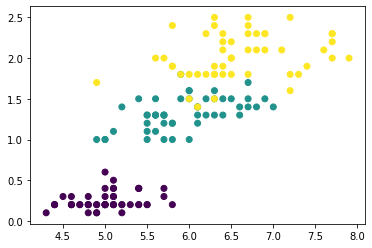

In [144]:
print("iris last 0,3 features")
fig = plt.figure()
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(iris['data'][:,0], iris['data'][:,3], c = iris.target)

iris last 1,2 features


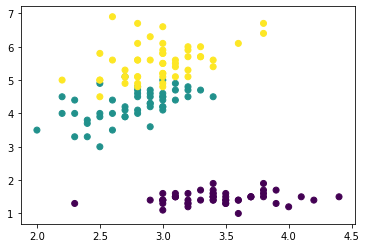

In [145]:
print("iris last 1,2 features")
fig = plt.figure()
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(iris['data'][:,1], iris['data'][:,2], c = iris.target)

iris last 1,3 features


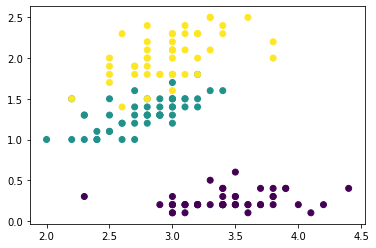

In [146]:
print("iris last 1,3 features")
fig = plt.figure()
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(iris['data'][:,1], iris['data'][:,3], c = iris.target)

iris last 2,3 features


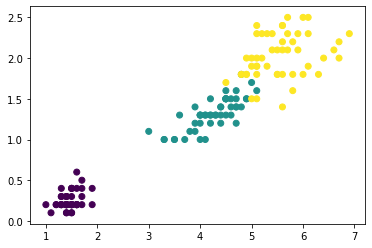

In [147]:
print("iris last 2,3 features")
fig = plt.figure()
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(iris['data'][:,2], iris['data'][:,3], c = iris.target)

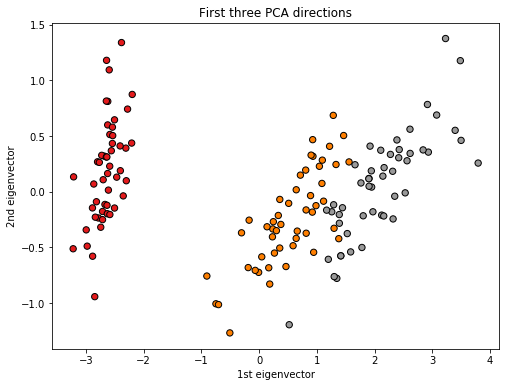

In [154]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)
X_reduced = PCA(n_components=2).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
plt.show()

C:\Users\dorli\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


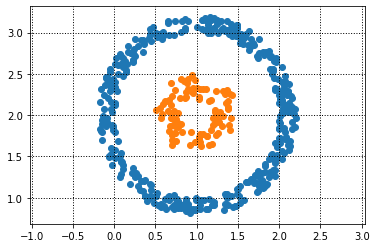

In [202]:
import matplotlib.pyplot as plt
from math import pi, cos, sin
import random

def point(h, k, r_start, r_stop):
    r = random.uniform(r_start, r_stop)
    theta = random.random() * 2 * pi
    return h + cos(theta) * r, k + sin(theta) * r

center_x = 1
center_y = 2
xy = [point(center_x,center_y,1,1.2) for _ in range(400)]
another_circle = [point(center_x,center_y,0.2,0.5) for _ in range(100)]
plt.scatter(*zip(*xy))
plt.scatter(*zip(*another_circle))
plt.grid(color='k', linestyle=':', linewidth=1)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

C:\Users\dorli\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


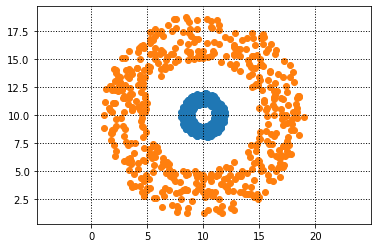

In [201]:
import matplotlib.pyplot as plt
from math import pi, cos, sin
import random

def point(h, k, r_start, r_stop):
    r = random.uniform(r_start, r_stop)
    theta = random.random() * 2 * pi
    return h + cos(theta) * r, k + sin(theta) * r

center_x = 10
center_y = 10
xy = [point(center_x,center_y,1,2) for _ in range(400)]
another_circle = [point(center_x,center_y,5,9) for _ in range(500)]
plt.scatter(*zip(*xy))
plt.scatter(*zip(*another_circle))
plt.grid(color='k', linestyle=':', linewidth=1)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

C:\Users\dorli\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


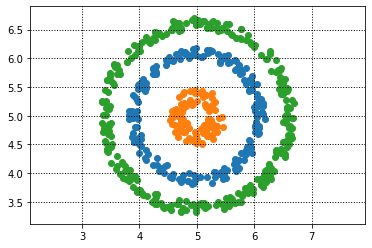

In [200]:
import matplotlib.pyplot as plt
from math import pi, cos, sin
import random

def point(h, k, r_start, r_stop):
    r = random.uniform(r_start, r_stop)
    theta = random.random() * 2 * pi
    return h + cos(theta) * r, k + sin(theta) * r
center_x = 5
center_y = 5
xy = [point(center_x,center_y,1,1.2) for _ in range(200)]
another_circle = [point(center_x,center_y,0.2,0.5) for _ in range(100)]
another_circle2 = [point(center_x,center_y,1.5,1.7) for _ in range(300)]

plt.scatter(*zip(*xy))
plt.scatter(*zip(*another_circle))
plt.scatter(*zip(*another_circle2))
plt.grid(color='k', linestyle=':', linewidth=1)
plt.axes().set_aspect('equal', 'datalim')
plt.show()